# Principal Component Analysis

### by Yury Yanovich (2017-04-03)

This notebook consists of two parts. In the first the data is sampled from a Gaussian distribution and then analyzed with principal component analysis. In the second real date is used and analyzed with principal component analysis.

# PART 1

## 2D Model data

## Imports

In [161]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Generate data

In [188]:
current_state = np.random.get_state()
#np.random.seed(0)
sample_size = np.random.randint(2, 5000)         # Number of data points. Play with this.
sample_dimensionality = 2                        # Dimensionality of data point. Do not change!

print("\nNumber of data points\n", sample_size)


Number of data points
 5000


The data is generated by first sampling from an isotropic Gaussian distribution with zero mean and unit variance in all directions (whitened data) and then transforming the data by a random matrix and random mean. Coefficients of mean vector and transformation matrix are drawn from a normal distribution with variance one.

In [189]:
np.random.set_state(current_state)
standard_data = np.random.normal(0, 1, 
    (sample_size, sample_dimensionality))                          # Initialize data with normal distribution (approximately whitened data).

initial_mean = np.random.normal(0, 1, sample_dimensionality)       # Initialize mean from normal distribution.
transformation_matrix = np.random.normal(0, 1, 
    (sample_dimensionality, sample_dimensionality))                # Create random transformation matrix.
data = np.dot(standard_data, transformation_matrix) + initial_mean # Transform initial data.

print("\nInitial data:\n", standard_data)
print("\nInitial mean:\n", initial_mean)
print("\nTransformation:\n", transformation_matrix)
print("\nData (transformed):\n", data)


Initial data:
 [[-1.38114432 -1.95859596]
 [ 0.1885821  -1.28775299]
 [ 0.87965069 -0.96323799]
 ..., 
 [-0.92374457  0.32939369]
 [ 0.51745334  0.3081197 ]
 [ 1.16979514  0.27001162]]

Initial mean:
 [-1.52142066  0.47149259]

Transformation:
 [[ 0.51604418  0.23227591]
 [ 0.47828747  1.07632645]]

Data (transformed):
 [[-3.17092404 -1.9574026 ]
 [-2.04002007 -0.87074694]
 [-1.52818669 -0.36094428]
 ..., 
 [-1.84056879  0.61146412]
 [-1.10702208  0.92332191]
 [-0.78861151  1.03382847]]


## Calculate mean and principal components of data

Hints: `np.average`, `np.dot`, `np.transpose`, and `np.linalg.eigh` might be useful here.  Use `print(np.<name>?)` to learn more about `<name>`.

In [ ]:
#np.average?


Numerical mean of centered data (should be zero):
 (-5.790923296444816e-17, 2.8421709430404008e-17)

Eigenvector 1
 [-0.86709716  0.49813904] 
Eigenvector 2
 [-0.49813904 -0.86709716]

Variances:
 [ 0.12590349  1.57093733]

Estimation of covariance matrix:
 [[ 0.48447781  0.62416063]
 [ 0.62416063  1.21236301]]

Sorted list of lambdas and eigen vectors:
 [(1.5709373348431801, array([-0.49813904, -0.86709716])), (0.12590349079881147, array([-0.86709716,  0.49813904]))]

Scalar product of eigen_vectors:
 0.0


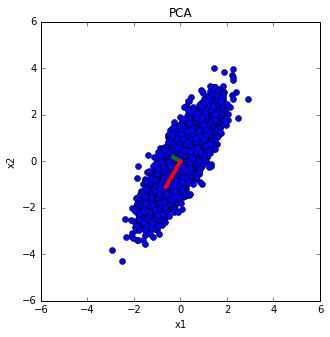

In [190]:
## EXERCISE 1
data_new = np.transpose(data)
x1 = data_new[0] - data_new[0].mean()
x2 = data_new[1] - data_new[1].mean()
mean_lst = (data_new[0].mean(), data_new[1].mean())             # Mean of data
x = np.vstack((x1, x2))                                         # Centered data

sample_mean = [data_new[0].mean(), data_new[1].mean()]          # Data mean as list.
sample_covariance = np.cov(x)                                   # Data covariance estimation as a 2x2 dimensional array.
eigen_vectors = np.linalg.eig(sample_covariance)[1]             # Principal components as column (!) vectors in a 2x2 dimensional array.
lambdas = np.linalg.eig(sample_covariance)[0]                   # Variances along the principal components as components of a list.
print("\nNumerical mean of centered data (should be zero):\n", (x1.mean(), x2.mean())) # Verify that data has zero mean.
print("\nEigenvector 1\n", eigen_vectors[:, 0], "\nEigenvector 2\n", eigen_vectors[:, 1])
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)

max_lambdas = []
for i in range(len(lambdas)):
    max_lambdas.append((lambdas[i], eigen_vectors[:, i]))
max_lambdas.sort(key=lambda x: (-x[0],))
print("\nSorted list of lambdas and eigen vectors:\n", max_lambdas)

e_v0 = eigen_vectors[:, 0] * (lambdas[0] ** 0.5)
e_v1 = eigen_vectors[:, 1] * (lambdas[1] ** 0.5)
eigen_vector1_0 = [0, e_v0[0]]
eigen_vector1_1 = [0, e_v0[1]]
eigen_vector2_0 = [0, e_v1[0]]
eigen_vector2_1 = [0, e_v1[1]]

print("\nScalar product of eigen_vectors:\n", round(np.dot(e_v0, e_v1), 10))
plt.figure(figsize=(5,5))
plt.plot(x1, x2, 'o')
plt.plot(eigen_vector1_0, eigen_vector1_1, '-', linewidth=4)
plt.plot(eigen_vector2_0, eigen_vector2_1, '-', linewidth=4)
plt.xlabel('x1')
plt.ylabel('x2')

plt.axis([-6, 6, -6, 6])
plt.title('PCA')

plt.show()




# EXERCISE END

## Calculate expected mean and principal components from transformation matrix and initial mean

Since the initial data has zero mean and variance one in all directions, it is possible to predict the data mean and principal components.

Since the initial mean has been added to the data after applying the transformation matrix $\textbf{T}$, the expected mean of the data is equal to the initial mean.
 
If the initial data points $\vec{\hat{x}}_i$ have zero mean and unit variance in all directions, they are whitened, i.e. their 2nd moment matrix is the identity matrix $\langle \vec{\hat{x}}_i \vec{\hat{x}}_i^T \rangle_i = \textbf{I}$.  The zero mean transformed data points $\vec{x}_i := \textbf{T}\vec{\hat{x}}_i $, i.e. before adding the initial mean, then have the 2nd moment matrix 
 \begin{eqnarray}
   \langle \vec{x}_i \vec{x}_i^T \rangle_i 
   &=& \langle \textbf{T}\vec{\hat{x}}_i \vec{\hat{x}}_i^T\textbf{T}^T \rangle_i \\
   &=& \textbf{T} \underbrace{\langle \vec{\hat{x}}_i \vec{\hat{x}}_i^T \rangle_i}_{\textbf{I}} \textbf{T}^T \\
   &=& \textbf{T} \textbf{T}^T \,. 
 \end{eqnarray}
Applying PCA to this matrix should yield a good approximation of the principal components and variances of the transformed data points and are in fact the exact expectation values as the number of data points goes to infinity.



Expected data mean:
 [-1.52142066  0.47149259]

Expected covariance:
 [[ 0.3202537   0.49682217]
 [ 0.49682217  1.38723753]]

Expected principal components:
First:
 [-0.86709716  0.49813904]
Second:
 [-0.49813904 -0.86709716]

Expected variances:
 [ 0.12590349  1.57093733]


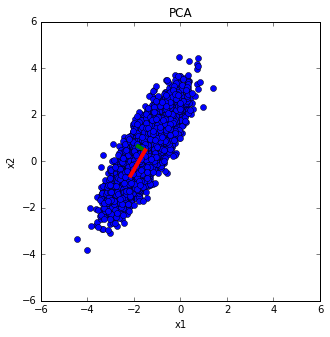

In [191]:
## EXERCISE 2

# Add missing code here.
# ...
expected_mean = initial_mean                           # Expected data mean as a list.
expected_covariance_matrix = np.dot(transformation_matrix, np.transpose(transformation_matrix)) # Expected covariance matrix
pcVecExp = np.linalg.eig(sample_covariance)[1]         # Expected principal components as column vectors in a 2x2 dimensional array.
pcVarExp = np.linalg.eig(sample_covariance)[0]         # Expected variances along the principal components as components of a 2 dimensional vector.
print("\nExpected data mean:\n",  expected_mean)
print("\nExpected covariance:\n", expected_covariance_matrix)
print("\nExpected principal components:\nFirst:\n", pcVecExp[:, 0])
print("Second:\n", pcVecExp[:, 1])
print("\nExpected variances:\n", pcVarExp)

x1_v0 = [initial_mean[0], pcVecExp[0, 0] * (pcVarExp[0] ** 0.5) + initial_mean[0]]
x2_v0 = [initial_mean[1], pcVecExp[1, 0] * (pcVarExp[0] ** 0.5) + initial_mean[1]]
x1_v1 = [initial_mean[0], pcVecExp[0, 1] * (pcVarExp[1] ** 0.5) + initial_mean[0]]
x2_v1 = [initial_mean[1], pcVecExp[1, 1] * (pcVarExp[1] ** 0.5) + initial_mean[1]]

x1 = data[:, 0]
x2 = data[:, 1]
plt.figure(figsize=(5,5))
plt.plot(x1, x2, 'o')
plt.plot(x1_v0, x2_v0, '-', linewidth=4)
plt.plot(x1_v1, x2_v1, '-', linewidth=4)
plt.xlabel('x1')
plt.ylabel('x2')

plt.axis([-6, 6, -6, 6])
plt.title('PCA')

plt.show()

# EXERCISE END

# Plot data and eigenvectors scaled by standard deviation and centered at mean

The following plot shows the data points in black, the true mean offset vector in yellow, the data mean vector in blue on top, the expected eigenvectors in green, and the data eigenvectors in red on top.  Since the polarity of the eigenvectors is arbitrary, they are plotted $\pm$.

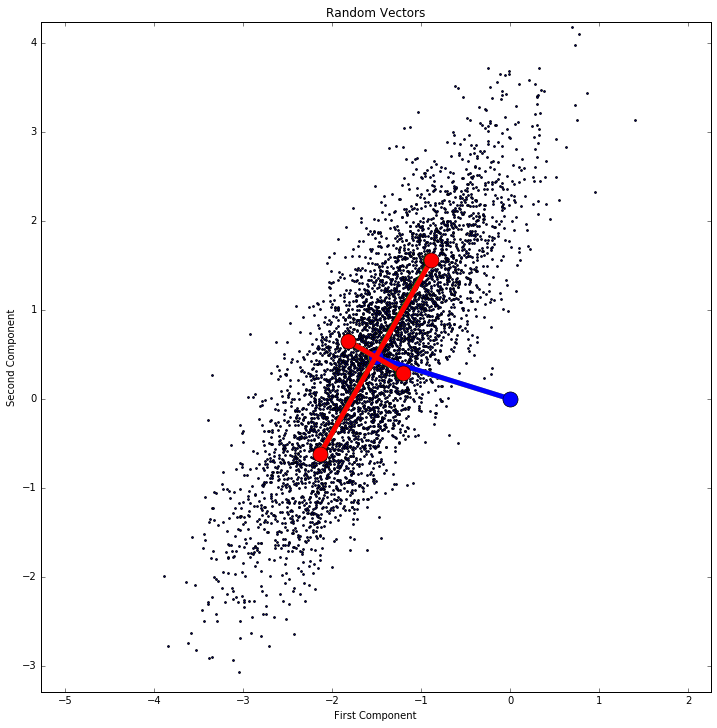

In [192]:
figure_handle = plt.figure(figsize=(12, 12))
subplot_handle = figure_handle.add_subplot(111)
root_lambdas = np.array([math.sqrt(x) for x in lambdas]) # Convert variances to standard deviations, ...
expected_root_lambdas = np.array([math.sqrt(x) for x in pcVarExp]) # ... also for the expected values.
plot_range = 3 * np.max(root_lambdas) # Take the largest standard deviation for the plot range.
subplot_handle.set(xlim = [sample_mean[0] - plot_range, sample_mean[0] + plot_range], 
                   ylim = [sample_mean[1] - plot_range, sample_mean[1] + plot_range], 
                   title='Random Vectors', xlabel='First Component', ylabel='Second Component')
subplot_handle.scatter(data[:, 0], data[:, 1], s=3) # Plot data points.
subplot_handle.plot([0, expected_mean[0]], [0, expected_mean[1]],
    'yo-',markersize=15,linewidth=5) # Plot ground truth mean offset of the data in yellow.
for component in range(0, 2):
    subplot_handle.plot([expected_mean[0] - pcVecExp[0, component] * expected_root_lambdas[component], 
                         sample_mean[0] + pcVecExp[0, component] * root_lambdas[component]], 
            [expected_mean[1] - pcVecExp[1, component] * expected_root_lambdas[component],
             sample_mean[1] + pcVecExp[1, component] * root_lambdas[component]],
            'go-',markersize=15,linewidth=5) # Plot expected eigenvectors scaled by standard deviation in green, ...
subplot_handle.plot([0, sample_mean[0]], [0, sample_mean[1]],
        'bo-',markersize=15,linewidth=5) # Plot data mean offset of the mixed data in blue.
for component in range(0,2):
    subplot_handle.plot([sample_mean[0] - eigen_vectors[0, component] * root_lambdas[component],
                         sample_mean[0] + eigen_vectors[0, component] * root_lambdas[component]], 
                        [sample_mean[1] - eigen_vectors[1, component] * root_lambdas[component], 
                         sample_mean[1] + eigen_vectors[1, component] * root_lambdas[component]],
                        'ro-', markersize=15, linewidth=5) # ... and data eigenvectors in red on top.
plt.show()

## Whiten the data

Knowing the mean, principal components and variances of the data allows us to whiten the data, i.e. normalize it such that it has zero mean and unit variance in all directions.

In [186]:
## EXERCISE 3


new_data = np.vstack((data_new[0] - sample_mean[0], data_new[1] - sample_mean[1]))
new_data = np.transpose(new_data)

matrix_lambdas = np.identity(2)
matrix_lambdas[0][0] = lambdas[0] ** 0.5
matrix_lambdas[1][1] = lambdas[1] ** 0.5
m_eigen_vectors = np.vstack((eigen_vectors[:, 0], eigen_vectors[:, 1]))
whitening_matrix = np.linalg.inv(np.dot(matrix_lambdas, m_eigen_vectors)) # Whitening matrix as a 2 x 2 dimensional array.
#print("\n", tmp_matrix, "\n")
whitened_data = np.dot(new_data, whitening_matrix)                              # Whitened data as a 2 x sample_size dimensional array.

print("\nWhitening matrix:\n", whitening_matrix)
print("\nWhitened data:\n", whitened_data)

# EXERCISE END


Whitening matrix:
 [[-13.28681199   0.23717972]
 [ -9.39248948  -0.33551939]]

Whitened data:
 [[-0.85923888  0.13889499]
 [-0.01435849 -0.75927931]
 [-2.50903682  0.59655527]
 ..., 
 [-0.18154795 -1.17651706]
 [ 0.13912782 -1.24876423]
 [-1.20777965  0.78828667]]


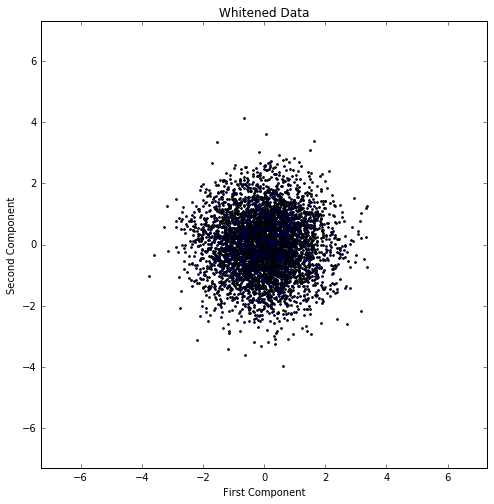

In [187]:
figure_handle = plt.figure(figsize=(8,8))
subplot_handle = figure_handle.add_subplot(111)
plotRange = 4
subplot_handle.set(xlim=[-plot_range, +plot_range], ylim=[-plot_range, +plot_range], 
                   title='Whitened Data', xlabel='First Component', ylabel='Second Component')
subplot_handle.scatter(whitened_data[:, 0], whitened_data[:, 1], s=3) # Plot data points.
plt.show()

## Exercise 4

#Vary the number of data points and observe how much the solution depends on it.

Было рассмотрено несколько вариантов sample_size. Можно сделать вывод, что чем больше количество точек, тем точнее решение. Например, при sample_size = 5000, expected eigenvectors(зеленый) и eigenvectors(красный), expected mean(желтый) и mean(синий) практически совпадают.


### Solution

I find it amazing how robust the solution is to the number of data points.  In some sense the mean seams more sensitive than the eigenvectors.

## Exercise 5

Make your previous experiments repeatable.

--------------------------------------------------------------------------------
Experiment № 0

Number of data points
 686

Initial data:
 [[ 0.6221209   2.15897118]
 [-0.30555887 -0.80144074]
 [-0.76027724 -0.8499873 ]
 ..., 
 [-0.5001168   1.02037007]
 [-0.63768102 -0.4688052 ]
 [-0.10666237  0.39794149]]

Initial mean:
 [ 0.97416218 -1.21719838]

Transformation:
 [[ 0.91574048 -0.7217097 ]
 [-0.97022933 -0.42614759]]

Data (transformed):
 [[-0.55083369 -2.58622944]
 [ 1.47193087 -0.65514154]
 [ 1.10262814 -0.30627888]
 ..., 
 [-0.47380798 -1.29108749]
 [ 0.84506042 -0.5571976 ]
 [ 0.49039263 -1.30980092]]

Numerical mean of centered data (should be zero):
 (2.3822861403035429e-16, -4.9199387680181867e-17)

Eigenvector 1
 [ 0.97188777 -0.23544459] 
Eigenvector 2
 [ 0.23544459  0.97188777]

Variances:
 [ 1.78166471  0.69648467]

Estimation of covariance matrix:
 [[ 1.72150867 -0.24831711]
 [-0.24831711  0.75664071]]

Sorted list of lambdas and eigen vectors:
 [(1.7816647103294723, ar

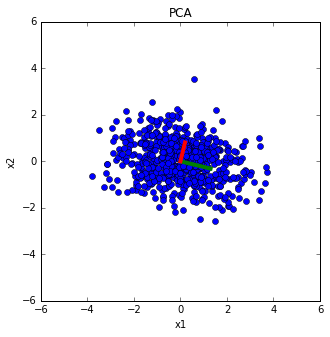


Expected data mean:
 [ 0.97416218 -1.21719838]

Expected covariance:
 [[ 1.35944552 -0.58092343]
 [-0.58092343  1.12294673]]

Expected principal components:
First:
 [ 0.97188777 -0.23544459]
Second:
 [ 0.23544459  0.97188777]

Expected variances:
 [ 1.78166471  0.69648467]


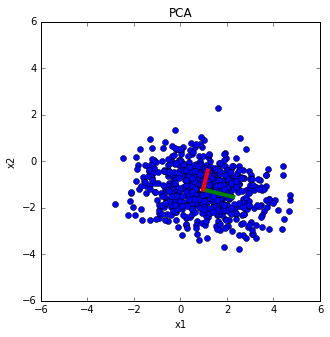

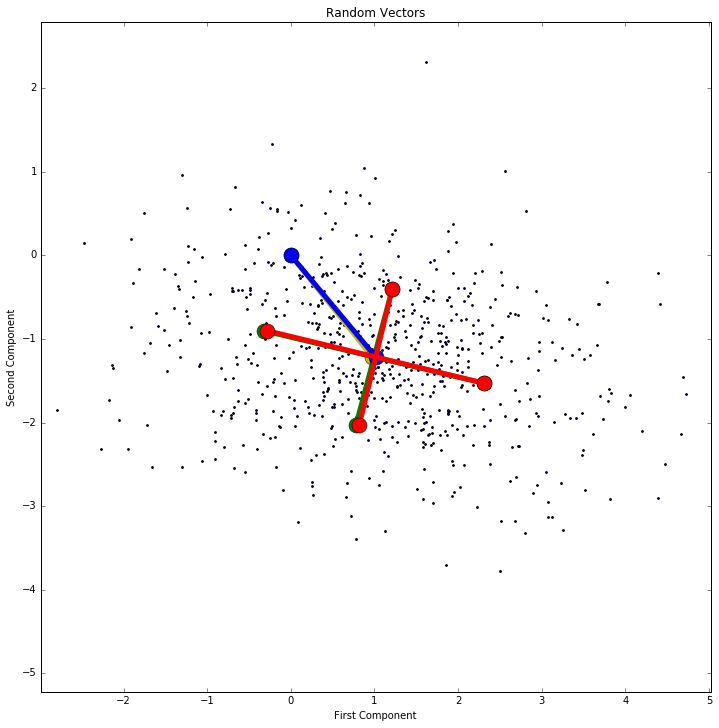


Matrix_lamdas:
 [[ 1.33479014  0.        ]
 [ 0.          0.83455657]]

M_eigen_vectors:
 [[ 0.97188777 -0.23544459]
 [ 0.23544459  0.97188777]] 


Eigen_vectors:
 [[ 0.97188777  0.23544459]
 [-0.23544459  0.97188777]] 


Whitening matrix:
 [[ 0.72812028  0.28211939]
 [-0.17639072  1.16455589]]

Whitened data:
 [[-0.89846511 -2.03742536]
 [ 0.23372481  0.78209555]
 [-0.09670813  1.08417816]
 ..., 
 [-1.07083215 -0.50742972]
 [-0.23998868  0.71930443]
 [-0.36547725 -0.25720287]]


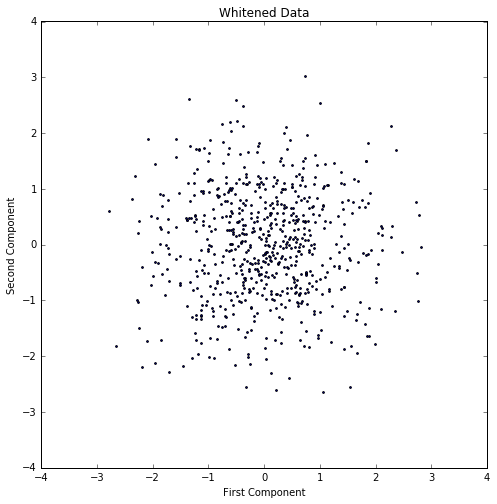

--------------------------------------------------------------------------------
Experiment № 1

Number of data points
 686

Initial data:
 [[-0.19062749  0.32663024]
 [ 1.80091148 -1.85691506]
 [ 0.90457063  0.19067768]
 ..., 
 [-0.87075166 -1.1271079 ]
 [-0.45233283 -1.27868148]
 [-0.95849498 -0.1141473 ]]

Initial mean:
 [-0.23567205  0.77456244]

Transformation:
 [[ 0.46793287 -0.10693671]
 [-0.07783199  0.15053586]]

Data (transformed):
 [[-0.3502952   0.84411708]
 [ 0.75156103  0.30244658]
 [ 0.17276546  0.70653446]
 ..., 
 [-0.55540032  0.6980076 ]
 [-0.34781112  0.63044601]
 [-0.67529905  0.85987748]]

Numerical mean of centered data (should be zero):
 (1.0357765827406708e-17, 3.3015378574858881e-17)

Eigenvector 1
 [ 0.95826794 -0.28587158] 
Eigenvector 2
 [ 0.28587158  0.95826794]

Variances:
 [ 0.22910968  0.0158437 ]

Estimation of covariance matrix:
 [[ 0.21168104 -0.05842242]
 [-0.05842242  0.03327234]]

Sorted list of lambdas and eigen vectors:
 [(0.22910967939394006, ar

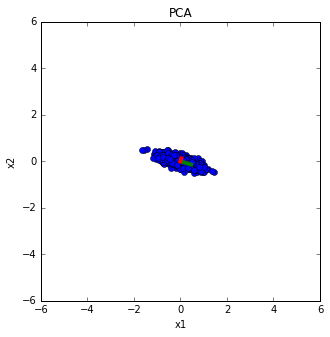


Expected data mean:
 [-0.23567205  0.77456244]

Expected covariance:
 [[ 0.23039663 -0.05251796]
 [-0.05251796  0.02871886]]

Expected principal components:
First:
 [ 0.95826794 -0.28587158]
Second:
 [ 0.28587158  0.95826794]

Expected variances:
 [ 0.22910968  0.0158437 ]


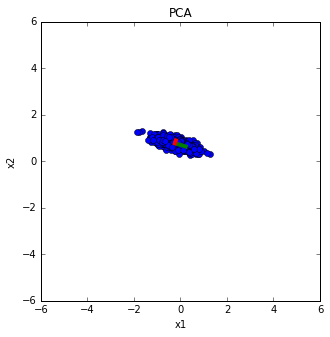

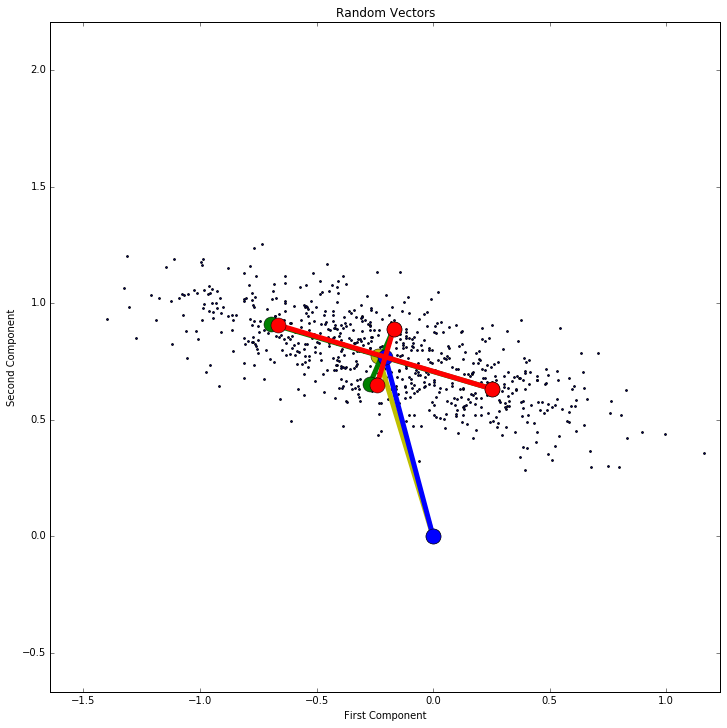


Matrix_lamdas:
 [[ 0.47865403  0.        ]
 [ 0.          0.12587176]]

M_eigen_vectors:
 [[ 0.95826794 -0.28587158]
 [ 0.28587158  0.95826794]] 


Eigen_vectors:
 [[ 0.95826794  0.28587158]
 [-0.28587158  0.95826794]] 


Whitening matrix:
 [[ 2.00200537  2.27113362]
 [-0.59724052  7.61304955]]

Whitened data:
 [[-0.33474696  0.23835236]
 [ 2.19468271 -1.38294931]
 [ 0.79459321  0.37886967]
 ..., 
 [-0.658106   -1.33980747]
 [-0.2021608  -1.38269443]
 [-0.99481915 -0.3797901 ]]


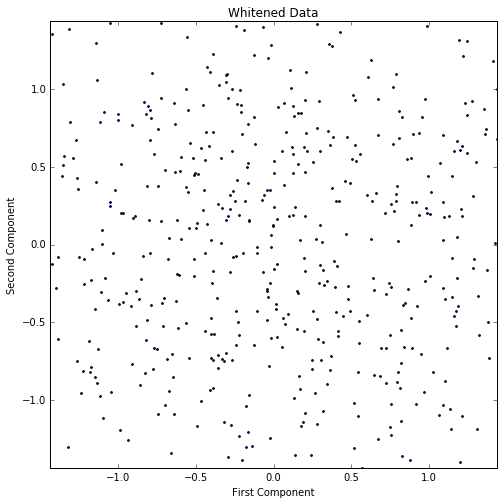

In [18]:
N = 2
for experiment_index in range(N):
    print("-"*80)
    print("Experiment №", experiment_index) 
    current_state = np.random.get_state()
    np.random.seed(0)
    sample_size = np.random.randint(2, 1000)         # Number of data points. Play with this.
    sample_dimensionality = 2                        # Dimensionality of data point. Do not change!

    print("\nNumber of data points\n", sample_size)
    np.random.set_state(current_state)
    standard_data = np.random.normal(0, 1, (sample_size, sample_dimensionality)) # Initialize data with normal distribution (approximately whitened data).

    initial_mean = np.random.normal(0, 1, sample_dimensionality)       # Initialize mean from normal distribution.
    transformation_matrix = np.random.normal(0, 1, 
        (sample_dimensionality, sample_dimensionality))                # Create random transformation matrix.
    data = np.dot(standard_data, transformation_matrix) + initial_mean # Transform initial data.

    print("\nInitial data:\n", standard_data)
    print("\nInitial mean:\n", initial_mean)
    print("\nTransformation:\n", transformation_matrix)
    print("\nData (transformed):\n", data)
    
    ## EXERCISE 1
    data_new = np.transpose(data)
    x1 = data_new[0] - data_new[0].mean()
    x2 = data_new[1] - data_new[1].mean()
    mean_lst = (data_new[0].mean(), data_new[1].mean())             # Mean of data
    x = np.vstack((x1, x2))                                         # Centered data

    sample_mean = [data_new[0].mean(), data_new[1].mean()]          # Data mean as list.
    sample_covariance = np.cov(x)                                   # Data covariance estimation as a 2x2 dimensional array.
    eigen_vectors = np.linalg.eig(sample_covariance)[1]             # Principal components as column (!) vectors in a 2x2 dimensional array.
    lambdas = np.linalg.eig(sample_covariance)[0]                   # Variances along the principal components as components of a list.
    print("\nNumerical mean of centered data (should be zero):\n", (x1.mean(), x2.mean())) # Verify that data has zero mean.
    print("\nEigenvector 1\n", eigen_vectors[:, 0], "\nEigenvector 2\n", eigen_vectors[:, 1])
    print("\nVariances:\n", lambdas)
    print("\nEstimation of covariance matrix:\n", sample_covariance)

    max_lambdas = []
    for i in range(len(lambdas)):
        max_lambdas.append((lambdas[i], eigen_vectors[:, i]))
    max_lambdas.sort(key=lambda x: (-x[0],))
    print("\nSorted list of lambdas and eigen vectors:\n", max_lambdas)

    e_v0 = eigen_vectors[:, 0] * (lambdas[0] ** 0.5)
    e_v1 = eigen_vectors[:, 1] * (lambdas[1] ** 0.5)
    eigen_vector1_0 = [0, e_v0[0]]
    eigen_vector1_1 = [0, e_v0[1]]
    eigen_vector2_0 = [0, e_v1[0]]
    eigen_vector2_1 = [0, e_v1[1]]

    print("\nScalar product of eigen_vectors:\n", round(np.dot(e_v0, e_v1), 10))
    plt.figure(figsize=(5,5))
    plt.plot(x1, x2, 'o')
    plt.plot(eigen_vector1_0, eigen_vector1_1, '-', linewidth=4)
    plt.plot(eigen_vector2_0, eigen_vector2_1, '-', linewidth=4)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.axis([-6, 6, -6, 6])
    plt.title('PCA')

    plt.show()
    ## EXERCISE 2

    # Add missing code here.
    # ...
    expected_mean = initial_mean                           # Expected data mean as a list.
    expected_covariance_matrix = np.dot(transformation_matrix, np.transpose(transformation_matrix)) # Expected covariance matrix
    pcVecExp = np.linalg.eig(sample_covariance)[1]         # Expected principal components as column vectors in a 2x2 dimensional array.
    pcVarExp = np.linalg.eig(sample_covariance)[0]         # Expected variances along the principal components as components of a 2 dimensional vector.
    print("\nExpected data mean:\n",  expected_mean)
    print("\nExpected covariance:\n", expected_covariance_matrix)
    print("\nExpected principal components:\nFirst:\n", pcVecExp[:, 0])
    print("Second:\n", pcVecExp[:, 1])
    print("\nExpected variances:\n", pcVarExp)

    x1_v0 = [initial_mean[0], pcVecExp[0, 0] * (pcVarExp[0] ** 0.5) + initial_mean[0]]
    x2_v0 = [initial_mean[1], pcVecExp[1, 0] * (pcVarExp[0] ** 0.5) + initial_mean[1]]
    x1_v1 = [initial_mean[0], pcVecExp[0, 1] * (pcVarExp[1] ** 0.5) + initial_mean[0]]
    x2_v1 = [initial_mean[1], pcVecExp[1, 1] * (pcVarExp[1] ** 0.5) + initial_mean[1]]

    x1 = data[:, 0]
    x2 = data[:, 1]
    plt.figure(figsize=(5,5))
    plt.plot(x1, x2, 'o')
    plt.plot(x1_v0, x2_v0, '-', linewidth=4)
    plt.plot(x1_v1, x2_v1, '-', linewidth=4)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.axis([-6, 6, -6, 6])
    plt.title('PCA')

    plt.show()
    
    figure_handle = plt.figure(figsize=(12, 12))
    subplot_handle = figure_handle.add_subplot(111)
    root_lambdas = np.array([math.sqrt(x) for x in lambdas]) # Convert variances to standard deviations, ...
    expected_root_lambdas = np.array([math.sqrt(x) for x in pcVarExp]) # ... also for the expected values.
    plot_range = 3 * np.max(root_lambdas) # Take the largest standard deviation for the plot range.
    subplot_handle.set(xlim = [sample_mean[0] - plot_range, sample_mean[0] + plot_range], 
                       ylim = [sample_mean[1] - plot_range, sample_mean[1] + plot_range], 
                       title='Random Vectors', xlabel='First Component', ylabel='Second Component')
    subplot_handle.scatter(data[:, 0], data[:, 1], s=3) # Plot data points.
    subplot_handle.plot([0, expected_mean[0]], [0, expected_mean[1]],
        'yo-',markersize=15,linewidth=5) # Plot ground truth mean offset of the data in yellow.
    for component in range(0, 2):
        subplot_handle.plot([expected_mean[0] - pcVecExp[0, component] * expected_root_lambdas[component], 
                             sample_mean[0] + pcVecExp[0, component] * root_lambdas[component]], 
                [expected_mean[1] - pcVecExp[1, component] * expected_root_lambdas[component],
                 sample_mean[1] + pcVecExp[1, component] * root_lambdas[component]],
                'go-',markersize=15,linewidth=5) # Plot expected eigenvectors scaled by standard deviation in green, ...
    subplot_handle.plot([0, sample_mean[0]], [0, sample_mean[1]],
            'bo-',markersize=15,linewidth=5) # Plot data mean offset of the mixed data in blue.
    for component in range(0,2):
        subplot_handle.plot([sample_mean[0] - eigen_vectors[0, component] * root_lambdas[component],
                             sample_mean[0] + eigen_vectors[0, component] * root_lambdas[component]], 
                            [sample_mean[1] - eigen_vectors[1, component] * root_lambdas[component], 
                             sample_mean[1] + eigen_vectors[1, component] * root_lambdas[component]],
                            'ro-', markersize=15, linewidth=5) # ... and data eigenvectors in red on top.
    plt.show()
    ## EXERCISE 3


    new_data = np.vstack((data_new[0] - sample_mean[0], data_new[1] - sample_mean[1]))
    new_data = np.transpose(new_data)

    matrix_lambdas = np.identity(2)
    matrix_lambdas[0][0] = lambdas[0] ** 0.5
    matrix_lambdas[1][1] = lambdas[1] ** 0.5
    print("\nMatrix_lamdas:\n", matrix_lambdas)
    m_eigen_vectors = np.vstack((eigen_vectors[:, 0], eigen_vectors[:, 1]))
    print("\nM_eigen_vectors:\n", m_eigen_vectors, "\n")
    print("\nEigen_vectors:\n", eigen_vectors, "\n")
    whitening_matrix = np.linalg.inv(np.dot(matrix_lambdas, m_eigen_vectors)) # Whitening matrix as a 2 x 2 dimensional array.
    whitened_data = np.dot(new_data, whitening_matrix)                              # Whitened data as a 2 x sample_size dimensional array.

    print("\nWhitening matrix:\n", whitening_matrix)
    print("\nWhitened data:\n", whitened_data)

    figure_handle = plt.figure(figsize=(8,8))
    subplot_handle = figure_handle.add_subplot(111)
    plotRange = 4
    subplot_handle.set(xlim=[-plot_range, +plot_range], ylim=[-plot_range, +plot_range], 
                       title='Whitened Data', xlabel='First Component', ylabel='Second Component')
    subplot_handle.scatter(whitened_data[:, 0], whitened_data[:, 1], s=3) # Plot data points.
    plt.show()

# PART 2

## PCA for real data

### 1. Airfoils

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import copy

%matplotlib inline

In [3]:
data = np.loadtxt('airfoils.csv', delimiter=',')
ref_points = np.loadtxt('ref_points.csv', delimiter=',')
test_point = np.loadtxt('test_afl.csv', delimiter=',')
print(data)

[[ 0.          0.00034873  0.00087806 ..., -0.00087806  0.         -0.00034873]
 [ 0.          0.0025839   0.0058062  ...,  0.0011505   0.          0.00093568]
 [ 0.00093364  0.0023877   0.0042779  ..., -0.0037593   0.00093364
  -0.0023783 ]
 ..., 
 [ 0.0019954   0.0037583   0.0059576  ...,  0.00012411  0.0019954
  -0.00073109]
 [ 0.          0.0020968   0.0043743  ..., -0.0018331   0.         -0.00095618]
 [ 0.          0.0017345   0.0040769  ..., -0.0027958   0.         -0.0012265 ]]


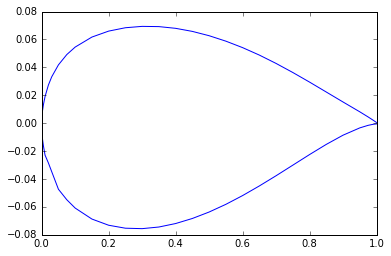

In [223]:
plt.plot(ref_points, test_point, label = 'Original')



Numerical mean of centered data (should be zero):
 [1.7434406793736755e-20, 1.0460644076242052e-19, 3.8355694946220863e-19, 6.973762717494702e-20, -1.0460644076242052e-18, -1.9526535608985165e-18, 3.3474061043974568e-18, -4.6724210207214505e-18, 2.0921288152484104e-18, -5.8579606826955495e-18, -3.6263566130972453e-18, 8.6474657696934308e-18, -3.1033244092851423e-18, -1.3947525434989404e-19, 2.126997628835884e-18, -2.0223911880734634e-18, 9.2402356006804807e-18, -7.6711389892441714e-18, 7.6711389892441726e-19, -8.3685152609936419e-19, 3.2079308500475629e-18, -2.1618664424233577e-18, -1.7434406793736753e-18, -6.4507305136825994e-18, 1.9177847473110428e-18, -2.0921288152484104e-18, 3.486881358747351e-20, 5.7533542419331289e-19, 2.9638491549352481e-19, -1.4819245774676241e-19, 0.0, 7.4096228873381211e-19, -7.9326550911502231e-19, -2.9638491549352481e-19, 1.8480471201360959e-18, -1.3250149163239933e-18, 8.7172033968683766e-19, 2.7197674598229336e-18, -2.8592427141728278e-18, 4.602683393546

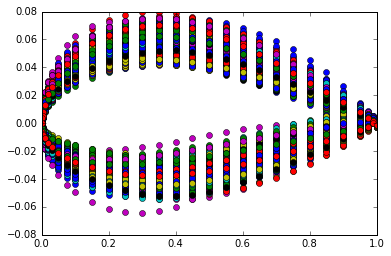

In [224]:
## EXERCISE 6 

sample_size = len(data)
sample_dim = len(data[0])
new_data = np.transpose(copy.deepcopy(data))
plt.plot(ref_points, new_data, 'o', label = 'New')
sample_mean = [new_data[0].mean()]
for i in range(1, sample_dim):
    sample_mean = np.vstack((sample_mean, new_data[i].mean()))

new_sample_mean = []
for i in range(sample_dim):
    new_data[i] -= sample_mean[i]
    new_sample_mean.append(new_data[i].mean())

sample_covariance = np.cov(new_data) 
lambdas = np.linalg.eig(sample_covariance)[0]           # Variances along the principal components as components of a list. Arrange it in decreasing order
eigen_vectors = np.linalg.eig(sample_covariance)[1]     # Principal components as column (!) vectors in an array. Each eigen vector should correspond to the propper eigenvalue

lambda_eig_v = []
for i in range(len(lambdas)):
    lambda_eig_v.append((lambdas[i], eigen_vectors[:, i]))

lambda_eig_v.sort(key=lambda x: (-x[0],))
lambdas = []
eigen_vectors = []
for elem in lambda_eig_v:
    lambdas.append(elem[0])
    eigen_vectors.append(elem[1])


print("\nNumerical mean of centered data (should be zero):\n", new_sample_mean) # Verify that data has zero mean.
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)
print("\nEigen vectors:\n", eigen_vectors)

# EXERCISE END


First 5 eigenvalues
 [0.0011271380946789881, 0.00047898721458373528, 0.00020515590304995144, 9.4475809239451632e-05, 4.1379257349356687e-05, 2.8969805950651001e-05, 9.180946170895861e-06, 5.6243571756951465e-06, 3.6456363535080588e-06, 1.6335116529056292e-06, 1.2948604440169161e-06, 4.7771388149692263e-07, 3.9870565602522291e-07, 2.6647086864546245e-07, 1.8491807043471404e-07, 1.2255249999547733e-07, 7.9803589529480463e-08, 6.3316241917414447e-08, 3.7778680844675741e-08, 2.5726701079352366e-08, 1.6930269611873579e-08, 1.4463322482238954e-08, 9.7254538120098007e-09, 8.5735862827512527e-09, 4.7495917523906422e-09, 3.2074464788518784e-09, 1.7757948367199691e-09, 1.5533003501392562e-09, 1.2385369204995921e-09, 9.5834511428559653e-10, 8.8976938664456479e-10, 6.68565567171276e-10, 4.6633855518494822e-10, 2.7405860224340905e-10, 2.2150038775915367e-10, 1.7895256862568655e-10, 1.4634815820194886e-10, 1.0452989323467015e-10, 9.4847211036665401e-11, 7.4589749341395949e-11, 6.7340266491841807e-1

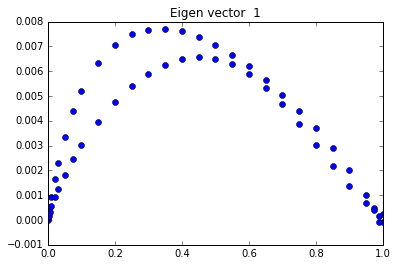

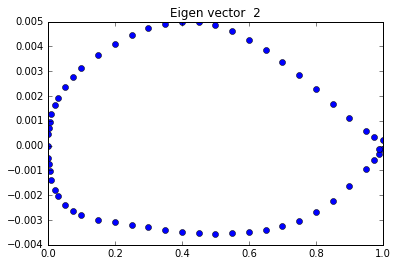

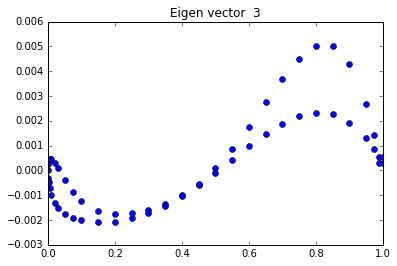

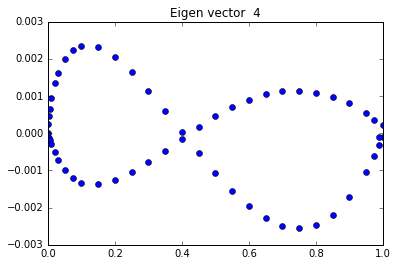

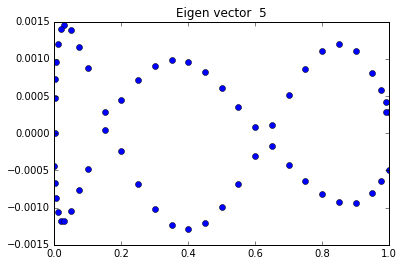


Last 5 eigen vectors

2.70142887363e-12


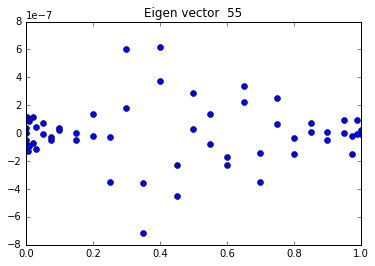

1.72170523404e-12


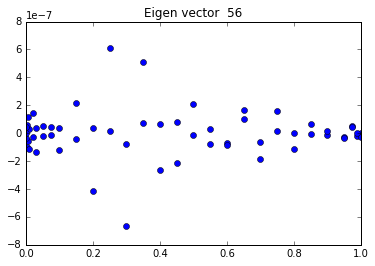

1.38017411427e-12


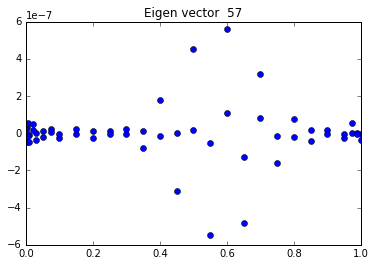

4.19556335e-22


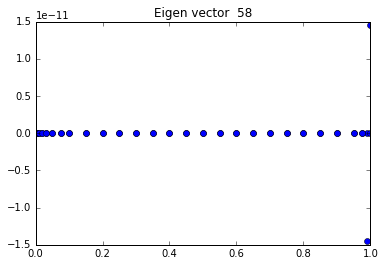

0.0


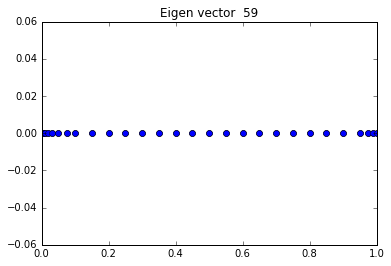

In [225]:
## EXERCISE 7 
# Plot eigen vectors for the biggest 5 and smallest 5 eigenvalues

print("\nFirst 5 eigenvalues\n", lambdas)
print("\nFirst 5 eigen vectors\n")
for i in range(5):
    e_v = eigen_vectors[i] * (lambdas[i] ** 0.5)
    plt.plot(ref_points, e_v, 'o')
    plt.title("Eigen vector  {:d}".format(i + 1))
    plt.show()
    
print("\nLast 5 eigen vectors\n")
for i in range(len(eigen_vectors) - 5, len(eigen_vectors)):
    e_v = eigen_vectors[i] * (lambdas[i] ** 0.5)
    plt.plot(ref_points, e_v, 'o')
    plt.title("Eigen vector  {:d}".format(i + 1))
    print(lambdas[i])
    plt.show()
# EXERCISE END

### Choose sample dimensionality

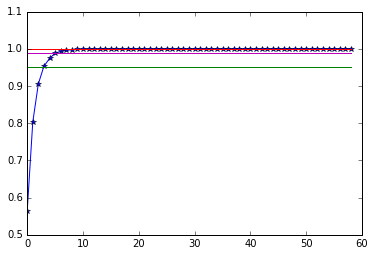

In [226]:
plt.plot(range(sample_dim), np.cumsum(lambdas) / np.sum(lambdas), "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")

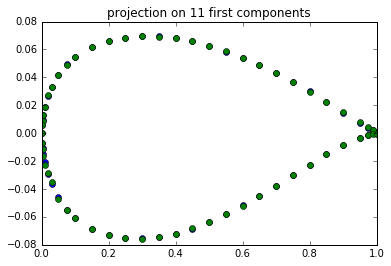

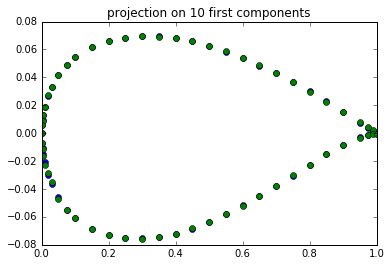

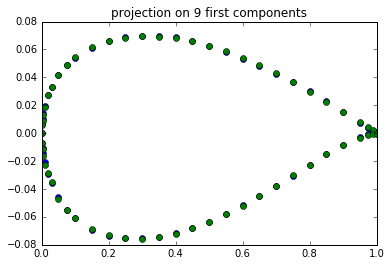

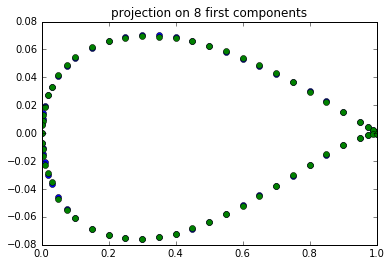

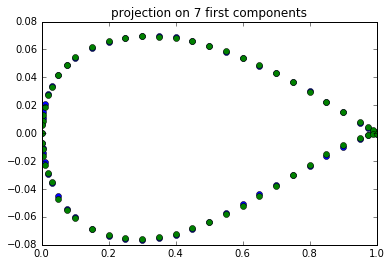

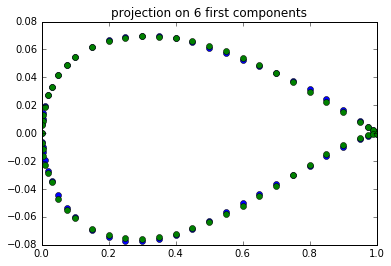

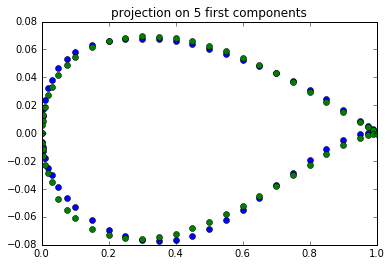

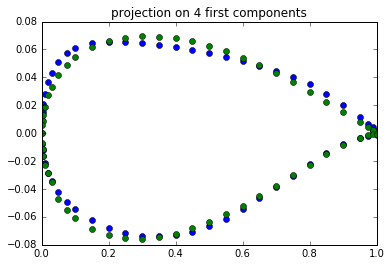

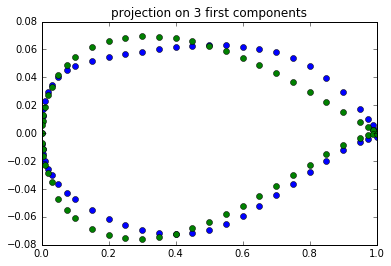

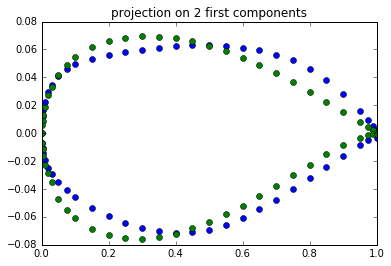

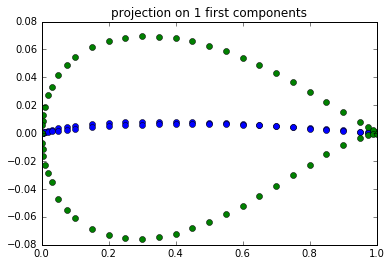

In [227]:
## EXERCISE 8 
# Find coordinates of sample points in the eigen basis

sample_points_eigen_b = np.dot(eigen_vectors, np.transpose(data)) #coordinatess of sample points in the eigen basis


# Plot projections of test airfoil on the different dimensions
for reduced_dim in range(11, 0, -1):
    #reduced dimension
    eigen_vectors_new = []
    eigen_vectors_new = copy.deepcopy(eigen_vectors[:reduced_dim])
    tmp = []
    tmp = np.dot(eigen_vectors_new, np.transpose(test_point))
    
    for i in range(len(eigen_vectors_new)):
        eigen_vectors_new[i] = np.dot(eigen_vectors_new[i], tmp[i])   
    projection = np.zeros((1, 59))
    for elem in eigen_vectors_new:
        projection += elem
    plt.plot(ref_points, projection[0], 'o') #blue
    plt.plot(ref_points, test_point, 'o')    #green
    plt.title("projection on {:d} first components".format(reduced_dim))
    plt.show()


# EXERCISE END

## Digits

(1797, 64)
[0 1 2 ..., 8 9 8]


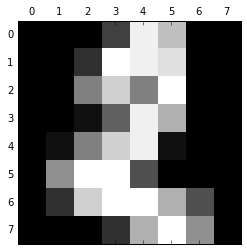

1797


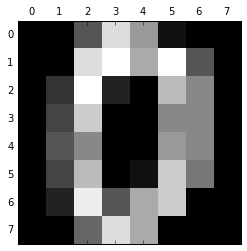

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target)

import numpy as np
import copy as copy
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show() 

print(len(digits.target))

plt.gray() 
plt.matshow(digits.data[0].reshape(8, 8)) 
plt.show() 

In [36]:
## EXERCISE 9 
new_data = np.transpose(digits.data)
print(new_data)

sample_size = len(new_data[0])
sample_dim = len(new_data)
sample_mean = [new_data[0].mean()]
for i in range(1, sample_dim):
    sample_mean = np.vstack((sample_mean, new_data[i].mean()))

new_sample_mean = []
for i in range(sample_dim):
    new_data[i] -= sample_mean[i]
    new_sample_mean.append(new_data[i].mean())

sample_covariance = np.cov(new_data) 
lambdas = np.linalg.eig(sample_covariance)[0]           # Variances along the principal components as components of a list. Arrange it in decreasing order
eigen_vectors = np.linalg.eig(sample_covariance)[1]     # Principal components as column (!) vectors in an array. Each eigen vector should correspond to the propper eigenvalue

lambda_eig_v = []
for i in range(len(lambdas)):
    lambda_eig_v.append((lambdas[i], eigen_vectors[:, i]))

lambda_eig_v.sort(key=lambda x: (-x[0],))
lambdas = []
eigen_vectors = []
for elem in lambda_eig_v:
    lambdas.append(elem[0])
    eigen_vectors.append(elem[1])


print("\nNumerical mean of centered data (should be zero):\n", new_sample_mean) # Verify that data has zero mean.
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)
print("\nEigen vectors:\n", eigen_vectors)


# EXERCISE END

[[  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  5.   0.   0. ...,   1.   2.  10.]
 ..., 
 [  0.  10.  16. ...,   6.  12.  12.]
 [  0.   0.   9. ...,   0.   0.   1.]
 [  0.   0.   0. ...,   0.   0.   0.]]

Numerical mean of centered data (should be zero):
 [0.0, -3.163239780790652e-17, -6.326479561581304e-17, -1.2652959123162608e-16, 3.9540497259883147e-17, -6.3264795615813035e-16, -1.2652959123162608e-16, -2.372429835592989e-17, 9.8851243149707875e-19, -6.326479561581304e-17, 2.3724298355929888e-16, 0.0, 8.224423430055695e-16, -7.2754514958184992e-16, 9.489719342371956e-17, 4.547157184886562e-17, 7.4138432362280906e-19, -3.7958877369487824e-16, 8.5407474081347605e-16, -5.3775076273441078e-16, -5.6938316054231734e-16, 3.7958877369487824e-16, -1.5025388958755597e-16, -4.9425621574853934e-18, -3.0891013484283711e-20, -4.1122117150278475e-16, -3.9540497259883147e-16, 1.9770248629941574e-16, 2.0561058575139237e-16, -3.1632397807906518e-16, 3.4795637588697173e


First 5 eigenvalues
 [179.006930097972, 163.7177468816777, 141.78843909228442, 101.10037520284789, 69.513165590987427, 59.108524886300017, 51.88453910779527, 44.015106669095552, 40.310995292784284, 37.011798402207688, 28.519041180837288, 27.321169806299089, 21.901488135866956, 21.324356544382066, 17.636722222051262, 16.946863852711498, 15.851389909342783, 15.004460221602484, 12.234473176254294, 10.886859323806602, 10.693566251924572, 9.5825977893715155, 9.2264026007255282, 8.6903687197889887, 8.3656119002875329, 7.1657796104253171, 6.9197388067408587, 6.1929550830224542, 5.8849912256052646, 5.1558668957148504, 4.4912965624404988, 4.2468779948540369, 4.047438829369459, 3.943403343322593, 3.7064724543480461, 3.5316530620149713, 3.0845740910306199, 2.7378000203615183, 2.6721089553249615, 2.5417056279177239, 2.2829874421087468, 1.9072422871736223, 1.8171656938942076, 1.6899643913762683, 1.4019721950711395, 1.2922188832004102, 1.1589341864455025, 0.93122000816489159, 0.66985059360788624, 0

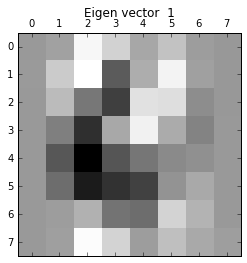

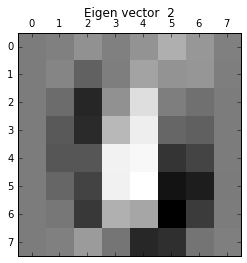

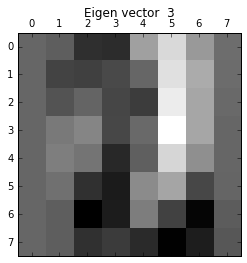

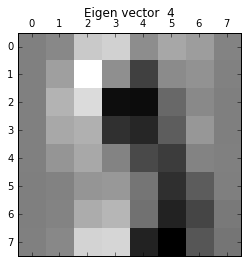

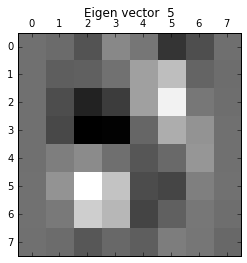


Last 5 eigen vectors



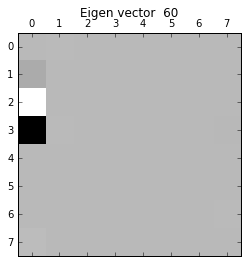

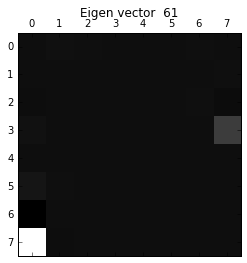

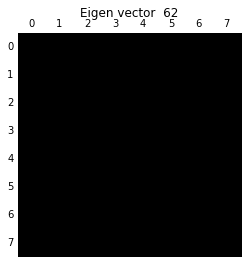

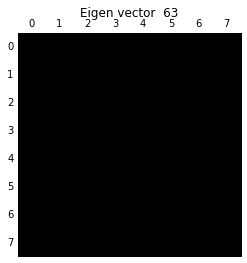

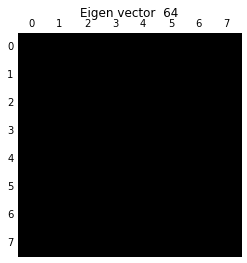

In [37]:

# Plot eigen vectors for the biggest 5 and smallest 5 eigenvalues

print("\nFirst 5 eigenvalues\n", lambdas)
print("\nFirst 5 eigen vectors\n")
for i in range(5):
    e_v = eigen_vectors[i] * (lambdas[i] ** 0.5)
    plt.gray()
    plt.matshow(e_v.reshape(8, 8)) 
    plt.title("Eigen vector  {:d}".format(i + 1))
    plt.show()
    
print("\nLast 5 eigen vectors\n")
for i in range(len(eigen_vectors) - 5, len(eigen_vectors)):
    e_v = eigen_vectors[i] * (lambdas[i] ** 0.5)
    plt.gray()
    plt.matshow(e_v.reshape(8, 8)) 
    plt.title("Eigen vector  {:d}".format(i + 1))
    plt.show()

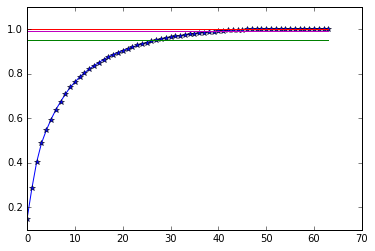

In [39]:
#Choose sample dimensionality
plt.plot(range(sample_dim), np.cumsum(lambdas) / np.sum(lambdas), "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
plt.show()

[[  1.25946645  -7.9576113   -6.99192297 ..., -10.8012837    4.87210009
    0.34438963]
 [-21.27488348  20.76869896   9.95598641 ...,   6.96025223 -12.42395362
   -6.36554919]
 [  9.46305462  -4.43950604  -2.95855808 ...,  -5.59955453  10.17086635
  -10.77370849]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]


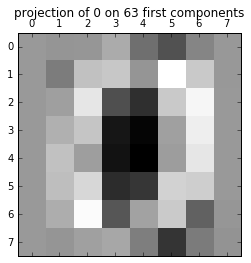

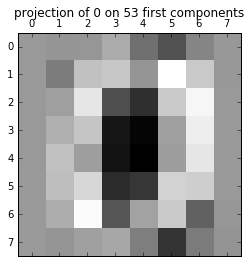

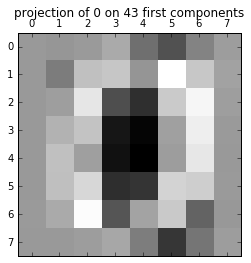

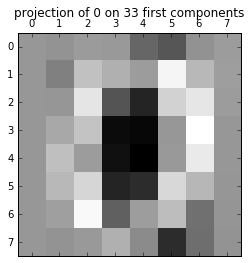

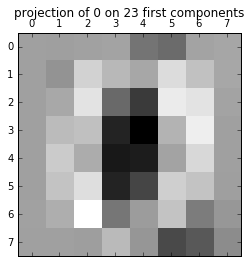

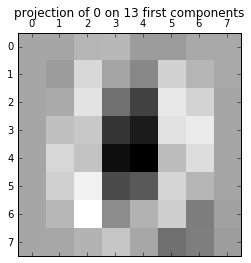

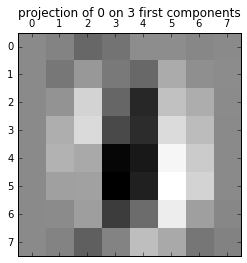

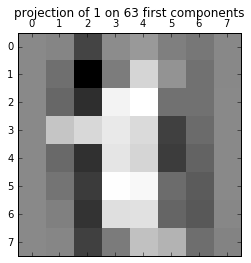

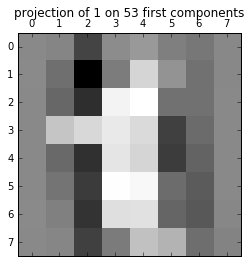

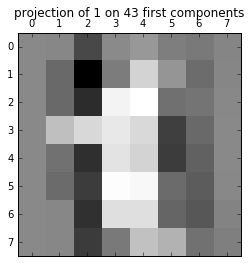

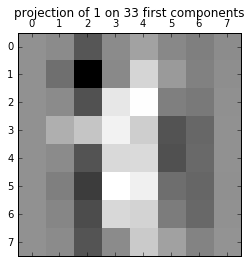

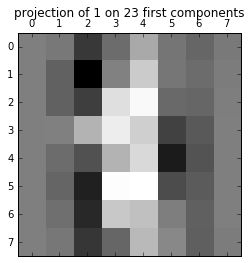

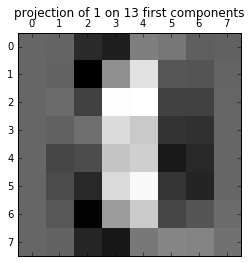

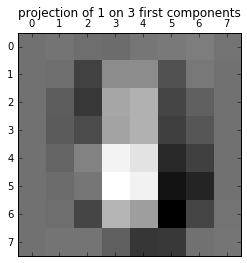

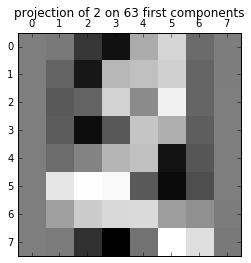

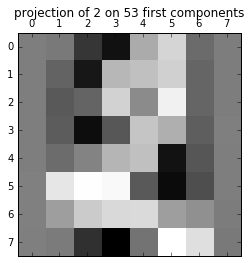

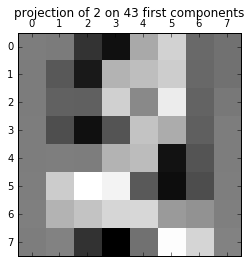

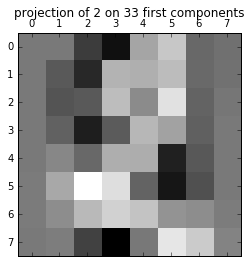

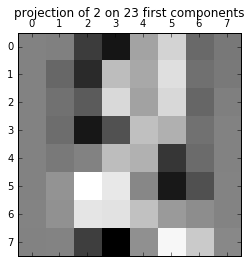

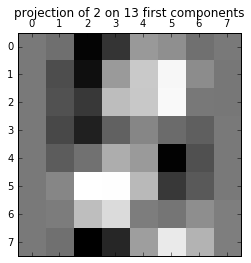

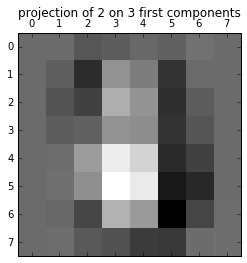

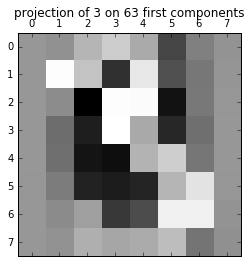

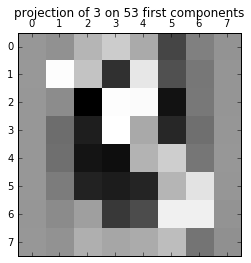

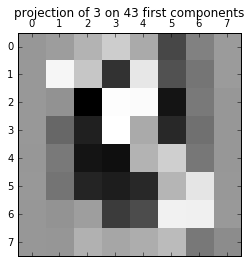

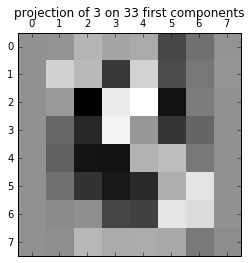

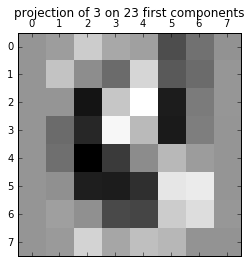

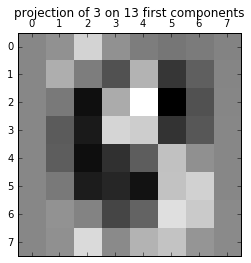

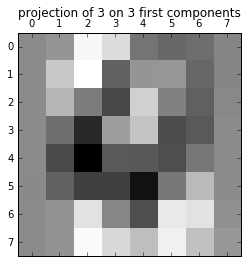

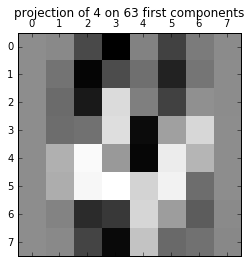

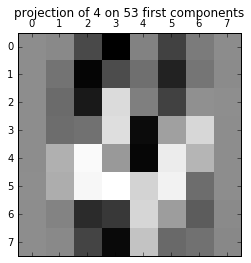

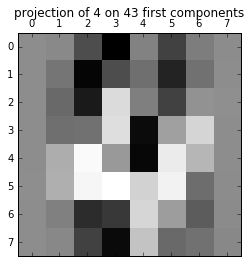

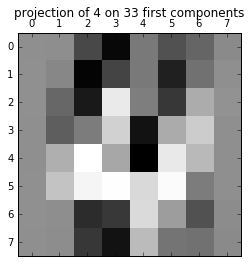

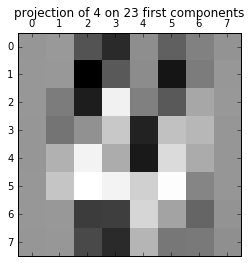

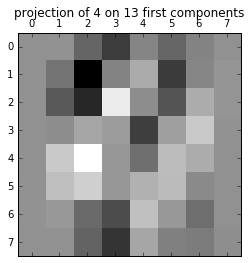

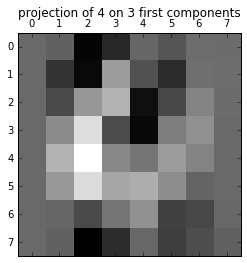

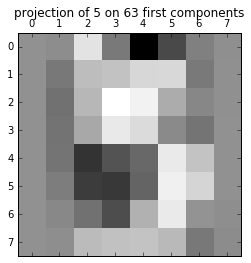

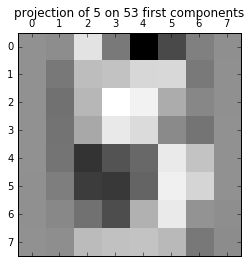

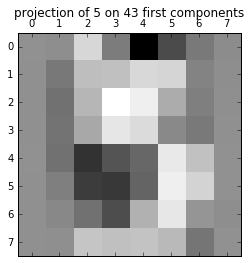

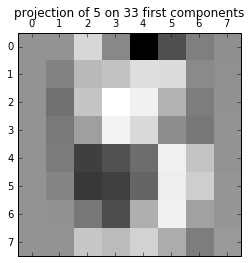

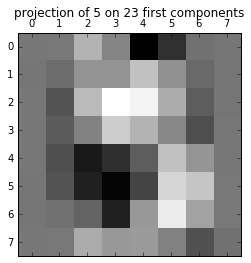

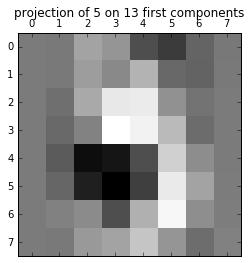

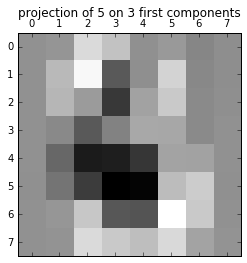

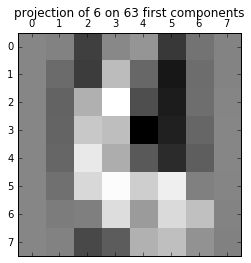

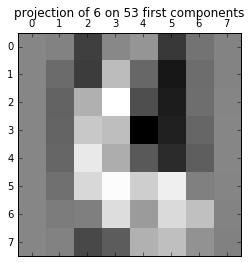

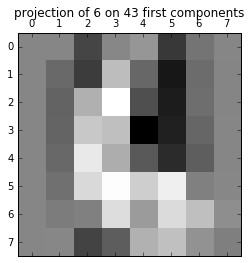

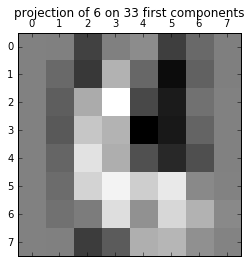

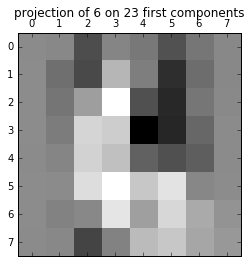

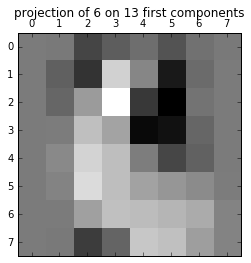

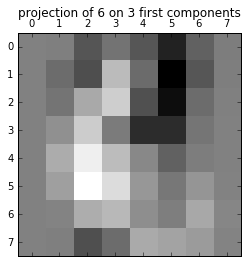

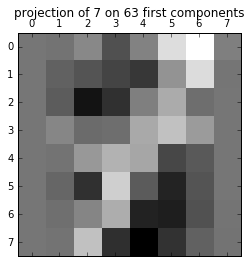

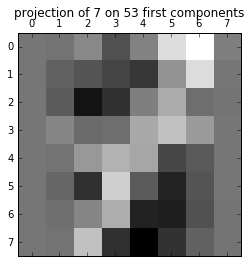

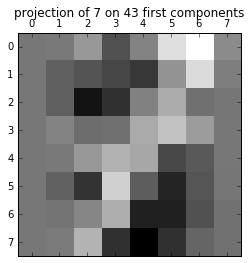

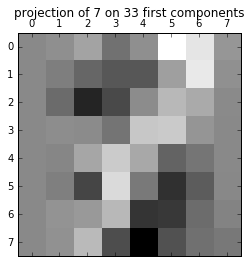

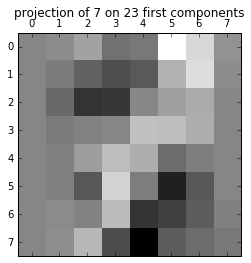

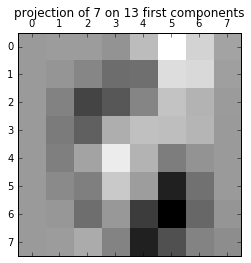

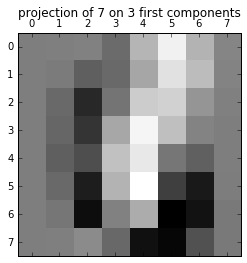

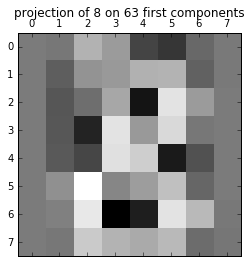

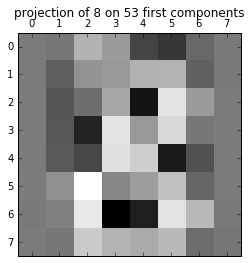

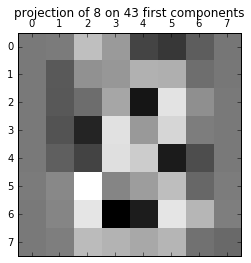

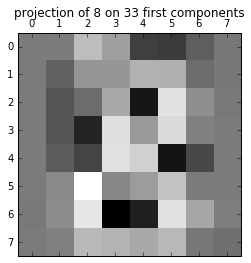

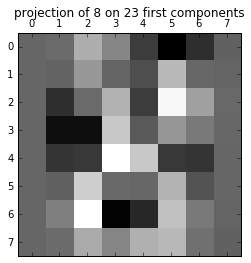

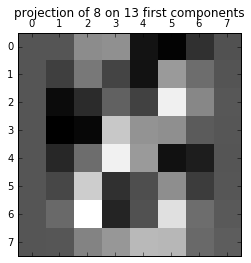

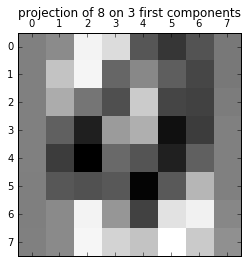

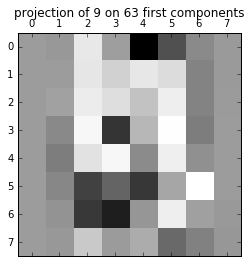

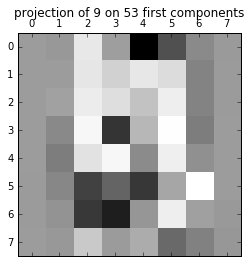

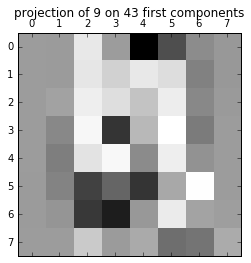

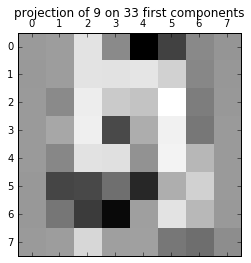

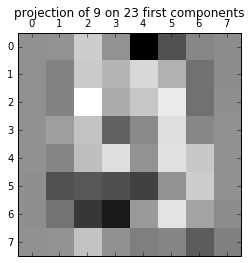

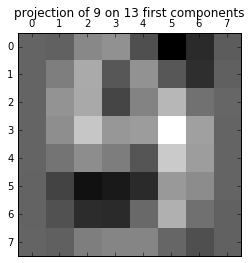

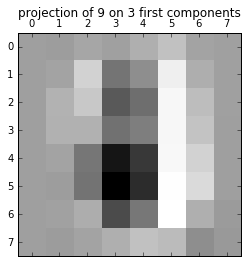

In [38]:
# Find coordinates of sample points in the eigen basis

projection_digits = np.dot(eigen_vectors, new_data) #coordinatess of sample points in the eigen basis
print(projection_digits)

# Plot projections of test airfoil on the different dimensions
for num in range(10):
    for reduced_dim in range(63, 0, -10):
        #reduced dimension
        eigen_vectors_new = []
        eigen_vectors_new = copy.deepcopy(eigen_vectors[:reduced_dim])
        tmp = []
        tmp = np.dot(eigen_vectors_new, np.transpose(digits.data[num]))
        for i in range(len(eigen_vectors_new)):
            eigen_vectors_new[i] = np.dot(eigen_vectors_new[i], tmp[i])
        projection = np.zeros((1, sample_dim))
        for elem in eigen_vectors_new:
            projection += elem
        plt.gray()
        plt.matshow(projection.reshape(8,8))
        plt.title("projection of {:d} on {:d} first components".format(num, reduced_dim))
        plt.show()


# EXERCISE END

## Faces

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import copy as copy
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

rng = RandomState(0)
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_row, n_col = 1, 5
n_components = n_row * n_col
image_shape = (64, 64)

In [82]:
sample_size, sample_dim = np.shape(faces)
sample_mean = np.average(faces, axis=0)
faces_centered = faces - sample_mean
print("Dataset consists of %d faces" % sample_size)

Dataset consists of 400 faces


In [83]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 3 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

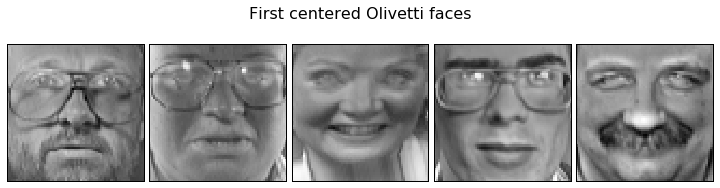

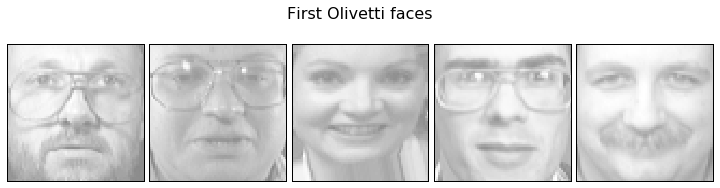

In [68]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])
plt.show()
plot_gallery("First Olivetti faces", faces[:n_components])
plt.show()

In [84]:
## EXERCISE 10 
new_sample_mean = faces_centered.mean(axis=0)

sample_covariance = 1 / sample_size * np.dot(np.transpose(faces_centered), faces_centered)

lambdas = np.linalg.eigh(sample_covariance)[0]           # Variances along the principal components as components of a list. Arrange it in decreasing order
eigen_vectors = np.linalg.eigh(sample_covariance)[1]     # Principal components as column (!) vectors in an array. Each eigen vector should correspond to the propper eigenvalue

lambda_eig_v = []
for i in range(len(lambdas)):
    lambda_eig_v.append((lambdas[i], eigen_vectors[:, i]))

lambda_eig_v.sort(key=lambda x: (-x[0],))
lambdas = []
eigen_vectors = []
for elem in lambda_eig_v:
    lambdas.append(elem[0])
    eigen_vectors.append(elem[1])


print("\nNumerical mean of centered data (should be zero):\n", new_sample_mean) # Verify that data has zero mean.
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)
print("\nEigen vectors:\n", eigen_vectors)


# EXERCISE END


Numerical mean of centered data (should be zero):
 [  1.20997427e-07   1.46180398e-07   6.21378433e-08 ...,  -1.56834723e-08
  -1.11386180e-08  -3.33786012e-08]

Variances:
 [18.793076, 11.044083, 6.2888532, 3.9446976, 2.8489025, 2.4914656, 1.9152631, 1.6071309, 1.5453494, 1.3196434, 1.2589536, 1.1340679, 0.98393166, 0.90532082, 0.83882588, 0.77161974, 0.72532505, 0.6436528, 0.59495997, 0.58952254, 0.5513196, 0.48506635, 0.46083745, 0.44962665, 0.43105534, 0.41974175, 0.40550524, 0.39131939, 0.36118981, 0.34818321, 0.31726092, 0.30320373, 0.28565276, 0.26402181, 0.25284541, 0.24942037, 0.24082315, 0.2356834, 0.2226665, 0.21624672, 0.2050128, 0.20044993, 0.19299728, 0.18928209, 0.18221937, 0.1786906, 0.17542906, 0.17397422, 0.16488096, 0.16177323, 0.15534905, 0.1510818, 0.14603887, 0.14121915, 0.14016888, 0.13612385, 0.13304779, 0.12956199, 0.12776047, 0.12500525, 0.12266445, 0.12014267, 0.11834688, 0.11657491, 0.11254738, 0.11096001, 0.10807429, 0.10573169, 0.10331845, 0.10158591, 0.1

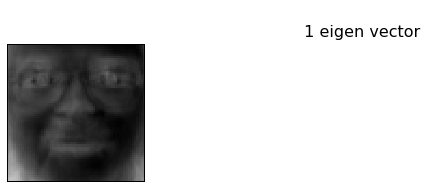

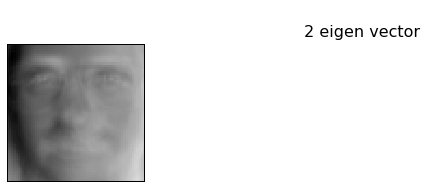

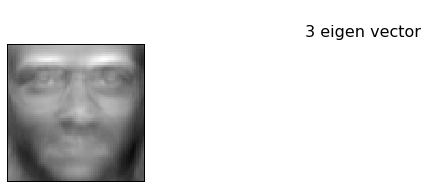

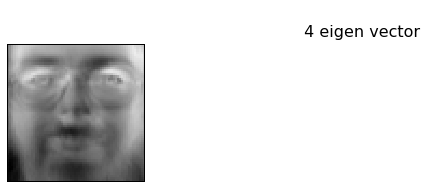

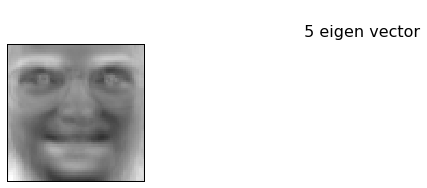

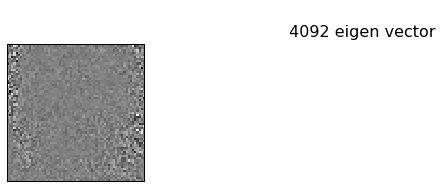

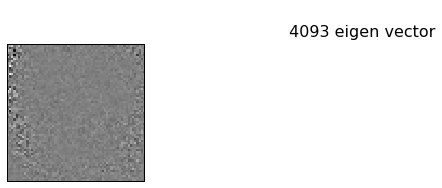

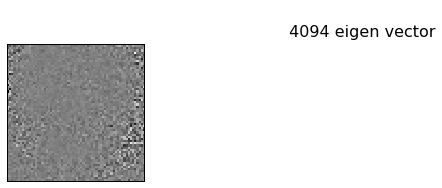

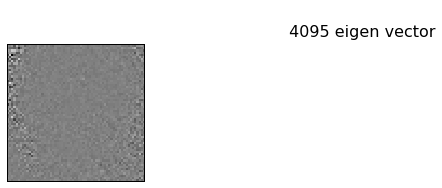

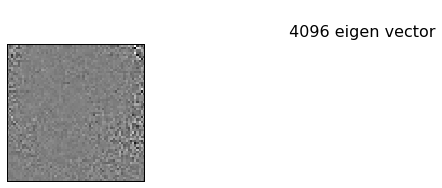

In [85]:
# Plot eigen vectors for the biggest 5 and smallest 5 eigenvalues
for i in range(5):
    e_v = []
    e_v.append(eigen_vectors[i] * (lambdas[i] ** 0.5))
    plot_gallery("\n {:d} eigen vector\n".format(i + 1), e_v)
    plt.show()

for i in range(len(eigen_vectors) - 5, len(eigen_vectors)):  
    e_v = []
    e_v.append(eigen_vectors[i])
    plot_gallery("\n {:d} eigen vector\n".format(i + 1), e_v)
    plt.show()
    

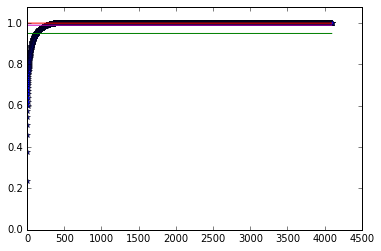

In [88]:
#Choose sample dimensionality
plt.plot(range(sample_dim), np.cumsum(np.real(lambdas)) / np.sum(np.real(lambdas)), "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
plt.axis([0, 4500, 0, 1.08])
plt.show()

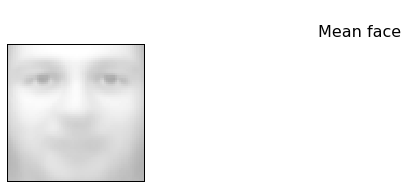

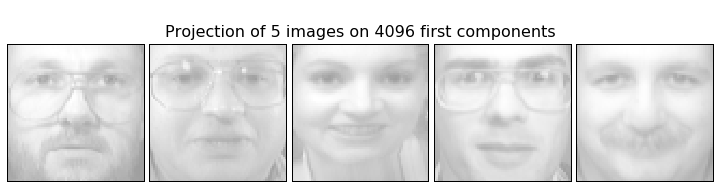

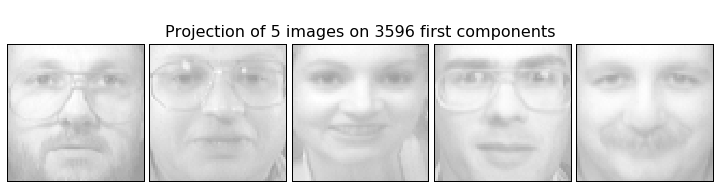

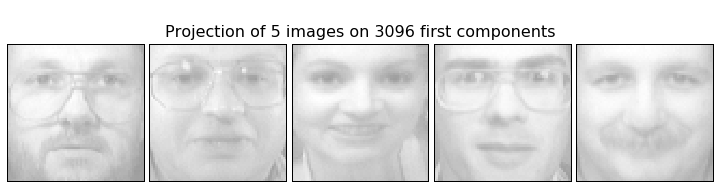

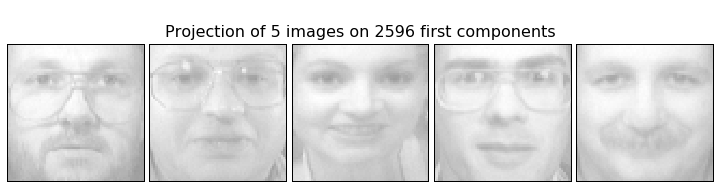

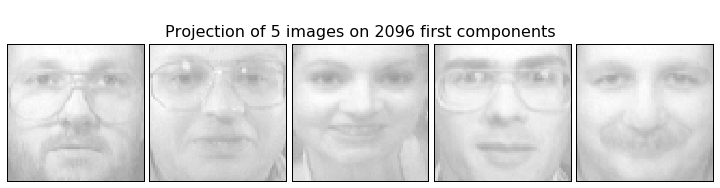

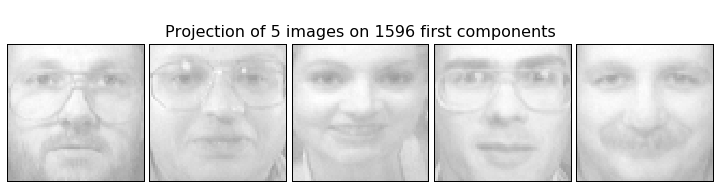

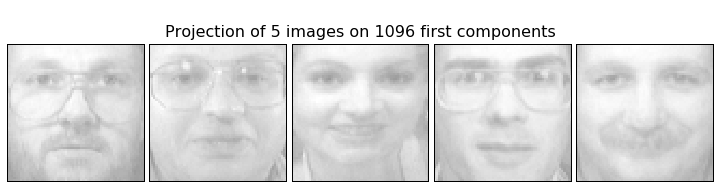

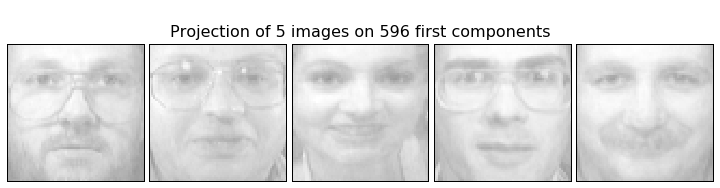

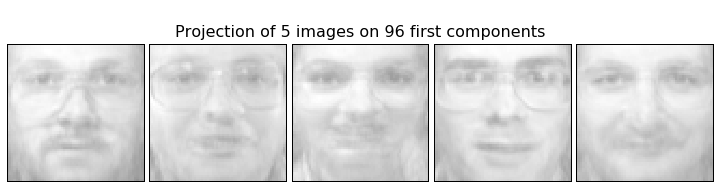

In [89]:
# Find coordinates of sample points in the eigen basis

#eigen_vectors = np.real(eigen_vectors)
images = np.zeros((n_components, sample_dim))
images[:] = sample_mean
plot_gallery("\nMean face\n", images[:1])
plt.show()
# Plot projections of test airfoil on the different dimensions
for reduced_dim in range(sample_dim, 0, -500):
    #reduced dimension
    eigen_vectors_new = []
    eigen_vectors_new = copy.deepcopy(eigen_vectors[:reduced_dim])
    tmp = []
    tmp = np.dot(eigen_vectors_new, np.transpose(faces[:n_components]))
    images[:] = sample_mean
    for i in range(len(tmp[0])):
        for j in range(len(tmp)):
            images[i] += np.dot(eigen_vectors_new[j], tmp[j][i])
    plot_gallery("\nProjection of {:d} images on {:d} first components\n".format(n_components, reduced_dim), images)
    plt.show()
